In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
#import tensorflow as tf
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
#from keras import backend as K
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
sns.set()
%matplotlib inline

In [104]:
raw_data=pd.read_csv('training-data.csv')
raw_data

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances,lights
0,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,...,6.60,733.500000,92.000000,7.000000,63.000000,5.300,13.275433,13.275433,60,30
1,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,...,6.48,733.600000,92.000000,6.666667,59.166667,5.200,18.606195,18.606195,60,30
2,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,...,6.37,733.700000,92.000000,6.333333,55.333333,5.100,28.642668,28.642668,50,30
3,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,...,6.25,733.800000,92.000000,6.000000,51.500000,5.000,45.410390,45.410390,50,40
4,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,...,6.13,733.900000,92.000000,5.666667,47.666667,4.900,10.084097,10.084097,60,40
5,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,45.730000,17.133333,55.030000,...,6.02,734.000000,92.000000,5.333333,43.833333,4.800,44.919484,44.919484,50,40
6,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,45.790000,17.100000,54.966667,...,5.90,734.100000,92.000000,5.000000,40.000000,4.700,47.233763,47.233763,60,50
7,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,45.863333,17.100000,54.900000,...,5.92,734.166667,91.833333,5.166667,40.000000,4.680,33.039890,33.039890,60,50
8,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,45.790000,17.166667,55.000000,...,5.93,734.233333,91.666667,5.333333,40.000000,4.670,31.455702,31.455702,60,40
9,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,46.096667,17.100000,55.000000,...,5.95,734.300000,91.500000,5.500000,40.000000,4.650,3.089314,3.089314,70,40


In [105]:
raw_data['Appliances'].describe()

count    11999.000000
mean       100.573381
std        104.804907
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max       1080.000000
Name: Appliances, dtype: float64

In [107]:
print("Skewness : %f" % raw_data['Appliances'].skew())
print("Kurtosis : %f" % raw_data['Appliances'].kurt())

Skewness : 3.291222
Kurtosis : 12.894820


In [108]:
#We need to check info() to know if there's any missing values
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 28 columns):
T1             11999 non-null float64
RH_1           11999 non-null float64
T2             11999 non-null float64
RH_2           11999 non-null float64
T3             11999 non-null float64
RH_3           11999 non-null float64
T4             11999 non-null float64
RH_4           11999 non-null float64
T5             11999 non-null float64
RH_5           11999 non-null float64
T6             11999 non-null float64
RH_6           11999 non-null float64
T7             11999 non-null float64
RH_7           11999 non-null float64
T8             11999 non-null float64
RH_8           11999 non-null float64
T9             11999 non-null float64
RH_9           11999 non-null float64
T_out          11999 non-null float64
Press_mm_hg    11999 non-null float64
RH_out         11999 non-null float64
Windspeed      11999 non-null float64
Visibility     11999 non-null float64
Tdewpoint      11

/Users/luddarell/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


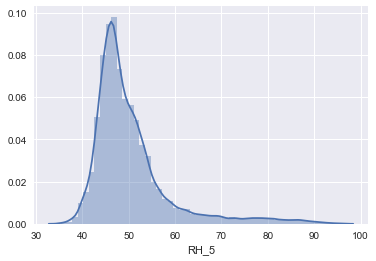

In [149]:
sns.distplot(raw_data.loc[:, 'RH_5'])

In [150]:
log_rh5 = raw_data[['RH_5']].applymap(lambda x: np.log(x+1))
log_rh5

,RH_5
0,4.028917
1,4.028917
2,4.026958
3,4.026958
4,4.026958
5,4.025887
6,4.024756
7,4.023564
8,4.025352
9,4.025352


/Users/luddarell/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


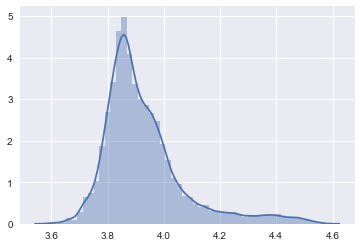

In [151]:
sns.distplot(log_rh5)

/Users/luddarell/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


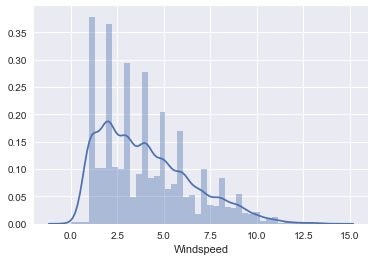

In [152]:
sns.distplot(raw_data.loc[:, 'Windspeed'])

In [153]:
log_windspeed = raw_data[['Windspeed']].applymap(lambda x: np.log(x+1))
log_windspeed.describe()

,Windspeed
count,11999.000000
mean,1.500432
std,0.491870
min,0.000000
25%,1.098612
50%,1.540445
75%,1.897120
max,2.708050


In [154]:
copy_data = pd.DataFrame.copy(raw_data)

In [155]:
copy_data

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,Appliances,lights
0,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,...,6.60,733.500000,92.000000,7.000000,63.000000,5.300,13.275433,13.275433,60,30
1,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,...,6.48,733.600000,92.000000,6.666667,59.166667,5.200,18.606195,18.606195,60,30
2,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,...,6.37,733.700000,92.000000,6.333333,55.333333,5.100,28.642668,28.642668,50,30
3,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,...,6.25,733.800000,92.000000,6.000000,51.500000,5.000,45.410390,45.410390,50,40
4,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,...,6.13,733.900000,92.000000,5.666667,47.666667,4.900,10.084097,10.084097,60,40
5,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,45.730000,17.133333,55.030000,...,6.02,734.000000,92.000000,5.333333,43.833333,4.800,44.919484,44.919484,50,40
6,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,45.790000,17.100000,54.966667,...,5.90,734.100000,92.000000,5.000000,40.000000,4.700,47.233763,47.233763,60,50
7,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,45.863333,17.100000,54.900000,...,5.92,734.166667,91.833333,5.166667,40.000000,4.680,33.039890,33.039890,60,50
8,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,45.790000,17.166667,55.000000,...,5.93,734.233333,91.666667,5.333333,40.000000,4.670,31.455702,31.455702,60,40
9,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,46.096667,17.100000,55.000000,...,5.95,734.300000,91.500000,5.500000,40.000000,4.650,3.089314,3.089314,70,40


# Remove Features rv1 & rv2

In [156]:
new_copy_data=copy_data.copy()
new_copy_data=new_copy_data.drop(['rv1','rv2'],axis=1)
new_copy_data

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Appliances,lights
0,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,...,17.033333,45.530000,6.60,733.500000,92.000000,7.000000,63.000000,5.300,60,30
1,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,...,17.066667,45.560000,6.48,733.600000,92.000000,6.666667,59.166667,5.200,60,30
2,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,...,17.000000,45.500000,6.37,733.700000,92.000000,6.333333,55.333333,5.100,50,30
3,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,...,17.000000,45.400000,6.25,733.800000,92.000000,6.000000,51.500000,5.000,50,40
4,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,...,17.000000,45.400000,6.13,733.900000,92.000000,5.666667,47.666667,4.900,60,40
5,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,45.730000,17.133333,55.030000,...,17.000000,45.290000,6.02,734.000000,92.000000,5.333333,43.833333,4.800,50,40
6,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,45.790000,17.100000,54.966667,...,17.000000,45.290000,5.90,734.100000,92.000000,5.000000,40.000000,4.700,60,50
7,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,45.863333,17.100000,54.900000,...,17.000000,45.290000,5.92,734.166667,91.833333,5.166667,40.000000,4.680,60,50
8,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,45.790000,17.166667,55.000000,...,17.000000,45.290000,5.93,734.233333,91.666667,5.333333,40.000000,4.670,60,40
9,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,46.096667,17.100000,55.000000,...,17.000000,45.290000,5.95,734.300000,91.500000,5.500000,40.000000,4.650,70,40


# Using Multi-layer Perceptron regressor.

In [157]:
model= MLPRegressor(
    hidden_layer_sizes=(19,),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size=256,
    learning_rate='constant',
    learning_rate_init=0.001,
    power_t=0.5,
    momentum=0.9,
    verbose=1,
    early_stopping=True)

In [158]:
X_train=new_copy_data.loc[:, :'Tdewpoint']
X_train

'''X_train=raw_data.loc[:, :'rv2']
X_train'''

"X_train=raw_data.loc[:, :'rv2']\nX_train"

In [159]:
Y_train=new_copy_data.loc[:,'Appliances':]
Y_train

'''Y_train=raw_data.loc[:,'Appliances':]
Y_train'''

"Y_train=raw_data.loc[:,'Appliances':]\nY_train"

In [160]:
model.fit(X_train,Y_train)

Iteration 1, loss = 6427.08659956
Validation score: -0.066742
Iteration 2, loss = 2809.90225704
Validation score: -0.000531
Iteration 3, loss = 2772.29452203
Validation score: 0.003372
Iteration 4, loss = 2770.77293852
Validation score: 0.004028
Iteration 5, loss = 2767.17436769
Validation score: 0.004866
Iteration 6, loss = 2765.13419815
Validation score: 0.006182
Iteration 7, loss = 2763.36664862
Validation score: 0.007846
Iteration 8, loss = 2759.48383387
Validation score: 0.008855
Iteration 9, loss = 2755.81332826
Validation score: 0.009101
Iteration 10, loss = 2752.37277665
Validation score: 0.009556
Iteration 11, loss = 2750.04404323
Validation score: 0.011964
Iteration 12, loss = 2746.26408532
Validation score: 0.012088
Iteration 13, loss = 2744.12469350
Validation score: 0.013829
Iteration 14, loss = 2740.70586138
Validation score: 0.015233
Iteration 15, loss = 2739.72127363
Validation score: 0.016190
Iteration 16, loss = 2735.68323261
Validation score: 0.017048
Iteration 17, l

MLPRegressor(activation='relu', alpha=0.0001, batch_size=256, beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(19,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=1, warm_start=False)

# Predict the Appliances and Lights from data_testing 

In [161]:
newtestFeature=pd.read_csv('testing-data.csv')
newtestFeature=newtestFeature.drop(['rv1','rv2'],axis=1)
newtestFeature

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,19.290000,41.400000,18.200000,41.400000,19.700000,40.663333,18.790000,38.290000,17.600000,55.590000,...,19.600000,41.933333,17.200000,37.790000,-0.450,756.900000,68.500000,2.500000,34.500000,-5.60
1,19.323333,41.400000,18.200000,41.400000,19.600000,40.590000,18.790000,38.290000,17.575000,55.567500,...,19.600000,41.863333,17.200000,37.790000,-0.467,756.866667,69.000000,2.333333,36.333333,-5.53
2,19.323333,41.400000,18.200000,41.400000,19.600000,40.590000,18.790000,38.230000,17.500000,55.466667,...,19.600000,41.790000,17.200000,37.700000,-0.483,756.833333,69.500000,2.166667,38.166667,-5.47
3,19.290000,41.400000,18.200000,41.400000,19.566667,40.590000,18.790000,38.200000,17.500000,55.384286,...,19.600000,41.790000,17.200000,37.700000,-0.500,756.800000,70.000000,2.000000,40.000000,-5.40
4,19.290000,41.400000,18.200000,41.400000,19.550000,40.672500,18.790000,38.200000,17.500000,55.326667,...,19.600000,41.790000,17.200000,37.590000,-0.617,756.766667,72.000000,2.000000,38.166667,-5.17
5,19.290000,41.290000,18.175000,41.475000,19.566667,40.700000,18.700000,38.163333,17.500000,55.234615,...,19.600000,41.824375,17.200000,37.590000,-0.733,756.733333,74.000000,2.000000,36.333333,-4.93
6,19.290000,41.290000,18.100000,41.500000,19.600000,40.590000,18.700000,38.090000,17.500000,55.200000,...,19.563636,41.860000,17.100000,37.500000,-0.850,756.700000,76.000000,2.000000,34.500000,-4.70
7,19.290000,41.290000,18.100000,41.560000,19.600000,40.590000,18.700000,38.000000,17.500000,55.175556,...,19.525000,41.872500,17.100000,37.500000,-0.967,756.666667,78.000000,2.000000,32.666667,-4.47
8,19.290000,41.290000,18.100000,41.560000,19.566667,40.626667,18.700000,38.060000,17.500000,55.090000,...,19.500000,41.900000,17.100000,37.400000,-1.080,756.633333,80.000000,2.000000,30.833333,-4.23
9,19.200000,41.200000,18.066667,41.560000,19.500000,40.700000,18.700000,38.090000,17.390000,55.000000,...,19.500000,41.900000,17.100000,37.400000,-1.200,756.600000,82.000000,2.000000,29.000000,-4.00


In [162]:
model.out_activation_='relu'
predictions=model.predict(newtestFeature)
predictionsDataFrame=pd.DataFrame({'Appliances':predictions[:,0],'Lights':predictions[:,1]})
join=newtestFeature.join(predictionsDataFrame)
join

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,Appliances,Lights
0,19.290000,41.400000,18.200000,41.400000,19.700000,40.663333,18.790000,38.290000,17.600000,55.590000,...,17.200000,37.790000,-0.450,756.900000,68.500000,2.500000,34.500000,-5.60,113.077568,7.603927
1,19.323333,41.400000,18.200000,41.400000,19.600000,40.590000,18.790000,38.290000,17.575000,55.567500,...,17.200000,37.790000,-0.467,756.866667,69.000000,2.333333,36.333333,-5.53,111.889881,7.540613
2,19.323333,41.400000,18.200000,41.400000,19.600000,40.590000,18.790000,38.230000,17.500000,55.466667,...,17.200000,37.700000,-0.483,756.833333,69.500000,2.166667,38.166667,-5.47,110.711997,7.484190
3,19.290000,41.400000,18.200000,41.400000,19.566667,40.590000,18.790000,38.200000,17.500000,55.384286,...,17.200000,37.700000,-0.500,756.800000,70.000000,2.000000,40.000000,-5.40,109.564295,7.467677
4,19.290000,41.400000,18.200000,41.400000,19.550000,40.672500,18.790000,38.200000,17.500000,55.326667,...,17.200000,37.590000,-0.617,756.766667,72.000000,2.000000,38.166667,-5.17,107.393704,7.292990
5,19.290000,41.290000,18.175000,41.475000,19.566667,40.700000,18.700000,38.163333,17.500000,55.234615,...,17.200000,37.590000,-0.733,756.733333,74.000000,2.000000,36.333333,-4.93,104.851007,7.015734
6,19.290000,41.290000,18.100000,41.500000,19.600000,40.590000,18.700000,38.090000,17.500000,55.200000,...,17.100000,37.500000,-0.850,756.700000,76.000000,2.000000,34.500000,-4.70,102.203824,6.771668
7,19.290000,41.290000,18.100000,41.560000,19.600000,40.590000,18.700000,38.000000,17.500000,55.175556,...,17.100000,37.500000,-0.967,756.666667,78.000000,2.000000,32.666667,-4.47,99.518192,6.486733
8,19.290000,41.290000,18.100000,41.560000,19.566667,40.626667,18.700000,38.060000,17.500000,55.090000,...,17.100000,37.400000,-1.080,756.633333,80.000000,2.000000,30.833333,-4.23,96.852592,6.205276
9,19.200000,41.200000,18.066667,41.560000,19.500000,40.700000,18.700000,38.090000,17.390000,55.000000,...,17.100000,37.400000,-1.200,756.600000,82.000000,2.000000,29.000000,-4.00,94.081845,5.794374


# Creating Mean Absolute Error

In [163]:
#Take Index Appliances and Lights from data_training
y_true=np.array(copy_data[['Appliances','lights']])

#Predict the Appliances and Lights from data_training  (For Calculate Mean Absolute Error)
y_pred=model.predict(X_train)

meanAbsoluteError=mean_absolute_error(y_true,y_pred)
meanAbsoluteError

32.384686515836044

In [164]:
y_true

array([[ 60,  30],
       [ 60,  30],
       [ 50,  30],
       ...,
       [110,  10],
       [110,   0],
       [110,   0]])

In [165]:
y_pred

array([[103.22480926,   5.65535675],
       [101.55718789,   5.20324353],
       [ 99.83143969,   4.70968227],
       ...,
       [ 92.50454671,   4.15263365],
       [ 89.59911417,   3.90967947],
       [ 87.10201966,   3.84440957]])

# Using RandomForestRegressor

In [166]:
regressor=RandomForestRegressor(n_estimators=250,max_features='sqrt')

In [167]:
regressor.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [86]:
y_predictions=regressor.predict(newtestFeature)
y_predictions

array([[113.88,   3.56],
       [111.44,   3.56],
       [117.56,   3.44],
       ...,
       [294.44,   7.12],
       [292.72,   7.2 ],
       [289.12,   7.24]])

# Create Mean Absolute Error (for Random Forest Regressor)

In [168]:
y_true=np.array(new_copy_data[['Appliances','lights']])

In [169]:
y_pred=regressor.predict(X_train)

In [170]:
y_true

array([[ 60,  30],
       [ 60,  30],
       [ 50,  30],
       ...,
       [110,  10],
       [110,   0],
       [110,   0]])

In [171]:
y_pred

array([[ 66.8 ,  29.2 ],
       [ 63.04,  29.8 ],
       [ 52.8 ,  31.84],
       ...,
       [111.76,   6.52],
       [110.32,   1.52],
       [113.28,   0.84]])

In [172]:
meanAbsoluteErrorRFR=mean_absolute_error(y_true,y_pred)
meanAbsoluteErrorRFR

5.861448454037855